In [1]:
#import the libraries
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2
import Augmentor
import os

In [2]:
path_n = 'D:/FYP/Images/normal'
path_w = 'D:/FYP/Images/whisper'
normal = []
whisper = []
n = 0
w = 0

for i in os.scandir(path_n):
    img = cv2.imread(i.path)
    img = cv2.resize(img, (224, 224))
    normal.append(img)
    n = n + 1
for i in os.scandir(path_w):
    img = cv2.imread(i.path)
    img = cv2.resize(img, (224, 224))
    whisper.append(img)
    w = w+1

print(n)
print(w)

422
423


In [3]:
normal = np.array(normal)
whisper = np.array(whisper)
print(normal.shape, whisper.shape)

(422, 224, 224, 3) (423, 224, 224, 3)


In [4]:
X = np.concatenate((normal, whisper), axis = 0)
print(X.shape)

(845, 224, 224, 3)


In [5]:
Y = []
for i in range(845):
    Y.append(1)
for i in range(423,845):
    Y[i] = 0
Y = np.array(Y)
Y.shape

(845,)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 3, test_size = 0.1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(760, 224, 224, 3) (85, 224, 224, 3) (760,) (85,)


In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from matplotlib import pyplot as plt
import tensorflow as tf 

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation = 'relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0

In [11]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='basicCNN.h5', 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [12]:
cnn.compile(optimizer=keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=10, callbacks=callbacks)

Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 0.4872 - accuracy: 0.7526
Epoch 00001: val_loss improved from inf to 0.27757, saving model to basicCNN.h5
24/24 [==============================] - 16s 644ms/step - loss: 0.4872 - accuracy: 0.7526 - val_loss: 0.2776 - val_accuracy: 0.9176
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 0.0661 - accuracy: 0.9829
Epoch 00002: val_loss improved from 0.27757 to 0.07736, saving model to basicCNN.h5
24/24 [==============================] - 15s 631ms/step - loss: 0.0661 - accuracy: 0.9829 - val_loss: 0.0774 - val_accuracy: 0.9882
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9934
Epoch 00003: val_loss improved from 0.07736 to 0.05102, saving model to basicCNN.h5
24/24 [==============================] - 16s 646ms/step - loss: 0.0164 - accuracy: 0.9934 - val_loss: 0.0510 - val_accuracy: 0.9882
Epoch 4/10
24/24 [==============================] - ETA: 0s - loss: 0.0275

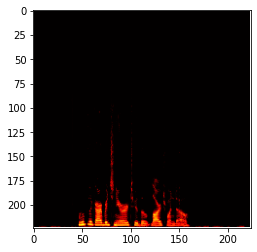

In [31]:
testimg = cv2.imread('D:/FYP/Images/normal/s101u415n.png')
testimg = cv2.resize(testimg, (224, 224))
plt.imshow(testimg[:,:,::-1]) 

In [32]:
testimg = np.expand_dims(testimg, axis = 0)
print(testimg.shape)

(1, 224, 224, 3)


In [33]:
result = cnn.predict(testimg/255)
print(result)
index = np.argmax(result)
print(index)
if result[0][index] < 0.80:
    print("cannot predict")
elif index == 0:
    print('whisper')
elif index == 1:
    print('normal')

[[1.4295219e-07 9.9999988e-01]]
1
normal
